In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [34]:
files = [f for f in os.listdir('daps/sample') if f.endswith('.wav')]

for f in files:
    y, sr = librosa.load(os.path.join('daps/sample/',f),sr=None)
    print(f"File: {f} - Duration: {librosa.get_duration(y=y, sr=sr)}, Sample Rate: {sr}")

File: m2_script1_clean.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_cleanraw.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_ipadflat_confroom1.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_ipadflat_office1.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_ipad_balcony1.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_ipad_bedroom1.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_ipad_confroom1.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_ipad_confroom2.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_ipad_livingroom1.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_ipad_office1.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_ipad_office2.wav - Duration: 165.1747619047619, Sample Rate: 44100
File: m2_script1_iphone_balcony1.wav - Duration: 165.1747619047619,

In [76]:
audio_path = 'daps/'

versions = ['clean','cleanraw','ipad_balcony1','ipad_bedroom1','ipad_confroom1','ipad_confroom2','ipad_livingroom1','ipad_office1','ipad_office2','ipadflat_confroom1','ipadflat_office1','iphone_balcony1','iphone_bedroom1','iphone_livingroom1','produced']

speakers = ['f','m']

data = []

for v in versions:
    for sp in speakers:
        for s in range(10):
            for sc in range(5):
                filename = f'{sp}{s+1}_script{sc+1}_{v}.wav'
                filepath = os.path.normpath(os.path.join(audio_path,v,filename))
                audio, sr = librosa.load(filepath, sr=None)
                trimmed, _ = librosa.effects.trim(audio,top_db=20)
                # print(f"Loaded audio file with duration {librosa.get_duration(y=audio,sr=sr)} seconds at {sr} Hz sampling rate.")
                data.append({'filename': filename,'duration': librosa.get_duration(y=audio,sr=sr),'sample_rate': sr,'trimmed': librosa.get_duration(y=trimmed,sr=sr)})
            print(f"Processed {v} {sp}{s}.")

Processed clean f0.
Processed clean f1.
Processed clean f2.
Processed clean f3.
Processed clean f4.
Processed clean f5.
Processed clean f6.
Processed clean f7.
Processed clean f8.
Processed clean f9.
Processed clean m0.
Processed clean m1.
Processed clean m2.
Processed clean m3.
Processed clean m4.
Processed clean m5.
Processed clean m6.
Processed clean m7.
Processed clean m8.
Processed clean m9.
Processed cleanraw f0.
Processed cleanraw f1.
Processed cleanraw f2.
Processed cleanraw f3.
Processed cleanraw f4.
Processed cleanraw f5.
Processed cleanraw f6.
Processed cleanraw f7.
Processed cleanraw f8.
Processed cleanraw f9.
Processed cleanraw m0.
Processed cleanraw m1.
Processed cleanraw m2.
Processed cleanraw m3.
Processed cleanraw m4.
Processed cleanraw m5.
Processed cleanraw m6.
Processed cleanraw m7.
Processed cleanraw m8.
Processed cleanraw m9.
Processed ipad_balcony1 f0.
Processed ipad_balcony1 f1.
Processed ipad_balcony1 f2.
Processed ipad_balcony1 f3.
Processed ipad_balcony1 f4.


In [77]:
df = pd.DataFrame(data)
print(df.describe())

          duration  sample_rate      trimmed
count  1500.000000       1500.0  1500.000000
mean    160.962896      44100.0   153.997070
std      19.905012          0.0    20.144998
min     116.163356      44100.0   108.204989
25%     146.426689      44100.0   138.515737
50%     160.008900      44100.0   154.575238
75%     174.548639      44100.0   167.790295
max     224.203220      44100.0   224.203220


From the data we can see that the sample rate for all recordings is 44100.

In [82]:
sample_rate = 44100

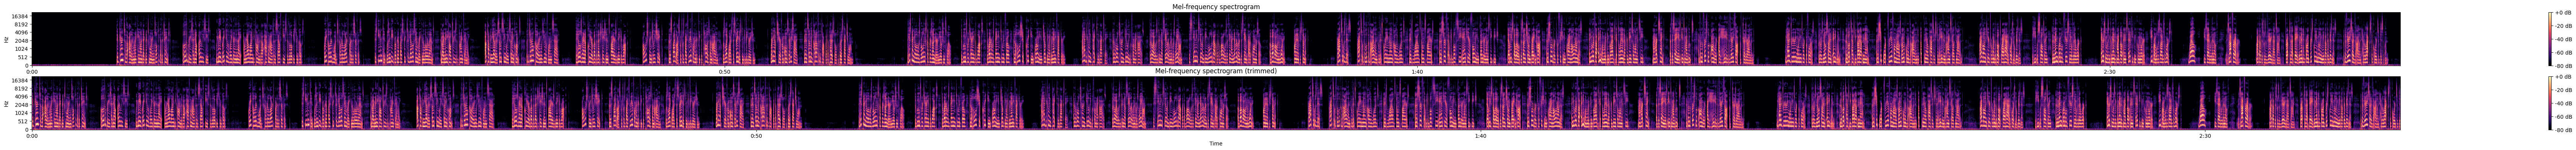

In [79]:
audio, sr = librosa.load(os.path.join(audio_path,'cleanraw','f1_script1_cleanraw.wav'), sr=None)

trimmed, _ = librosa.effects.trim(audio, top_db=20)

S = librosa.feature.melspectrogram(y=audio, sr=sr)
S_t = librosa.feature.melspectrogram(y=trimmed, sr=sr)

S_db = librosa.power_to_db(S, ref=np.max)
S_t_db = librosa.power_to_db(S_t, ref=np.max)

plt.figure(figsize=(100, 4))
plt.subplot(2,1,1)
plt.title('Mel-frequency spectrogram')
librosa.display.specshow(S_db,sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.subplot(2,1,2)
plt.title('Mel-frequency spectrogram (trimmed)')
librosa.display.specshow(S_t_db,sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [86]:
def time_shift(audio, max_shift = 0.5, sr = 44100):
    shift = np.random.uniform(-max_shift, max_shift)
    shift_samples = int(shift * sr)
    return np.roll(audio, shift_samples), shift

-1.5094327312041966


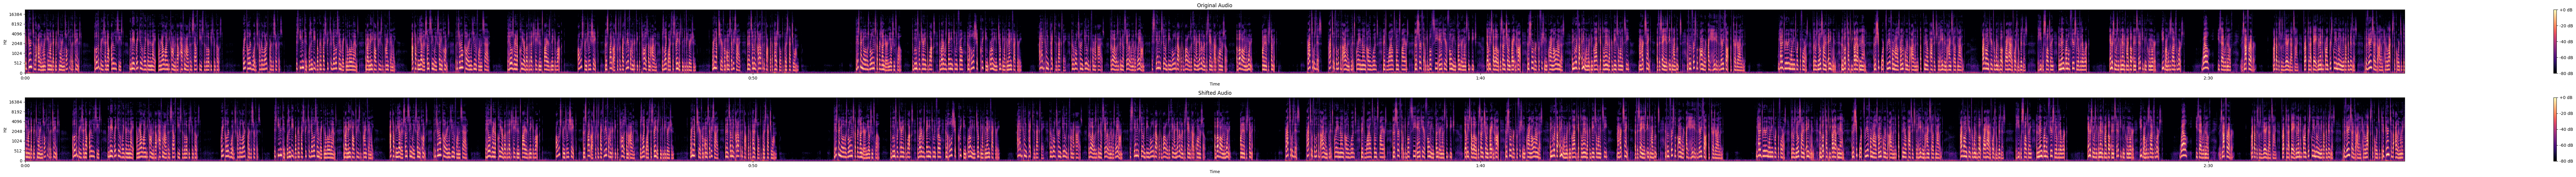

In [88]:
shifted_audio, shift = time_shift(trimmed, max_shift=2.5, sr=sample_rate)

print(shift)

S_s = librosa.feature.melspectrogram(y=shifted_audio, sr=sample_rate)
S_s_db = librosa.power_to_db(S_s, ref=np.max)

# Plot original and shifted audio
plt.figure(figsize=(100, 6))
plt.subplot(2, 1, 1)
plt.title("Original Audio")
librosa.display.specshow(S_t_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.subplot(2, 1, 2)
plt.title("Shifted Audio")
librosa.display.specshow(S_s_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


In [107]:
def split_audio(audio, sr=44100, duration=5.0):
    samples_per_segment = duration * sr
    segments = len(audio)
    return np.array_split(audio, int(segments/samples_per_segment))

In [109]:
def generate_spectrograms(audio, sr, fragment_duration=5.0, n_shifts=5, max_shift=2.5):
    spectrograms = []
    
    for fragment in split_audio(audio, sr, fragment_duration):
        S = librosa.feature.melspectrogram(y=fragment, sr=sr)
        S_db = librosa.power_to_db(S, ref=np.max)
        spectrograms.append(S_db)

    for _ in range(n_shifts):
        shifted_audio, _ = time_shift(audio, max_shift, sr)
        
        for fragment in split_audio(shifted_audio, sr, fragment_duration):
            S = librosa.feature.melspectrogram(y=fragment, sr=sr)
            S_db = librosa.power_to_db(S, ref=np.max)
            spectrograms.append(S_db)
    return spectrograms

In [100]:
classes = ['class_0','class_1']
class_1_speakers = ['f1','f7','f8','m3','m6','m8']

class_1_files = [f for f in os.listdir('daps/cleanraw') if f.split('_')[0] in class_1_speakers]
class_0_files = [f for f in os.listdir('daps/cleanraw') if f not in class_1_files]

In [124]:
def process_speakers(files, class_label):
    os.makedirs(os.path.join('spectrograms',class_label), exist_ok=True)
    for f in files:
        audio, sr = librosa.load(os.path.join('daps/cleanraw',f), sr=None)
        trimmed, _ = librosa.effects.trim(audio, top_db=20)
        spectrograms = generate_spectrograms(trimmed, sr)

        for i, S_db in enumerate(spectrograms):
            plt.figure(figsize=(1, 1),dpi=128)
            plt.axis('off')
            librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
            plt.savefig(os.path.join("spectrograms",class_label,f"{f.split('.')[0]}_shift_{i}.png"),bbox_inches='tight',pad_inches=0)
            plt.close()

In [125]:
# process_speakers(class_0_files, 'class_0')
process_speakers(class_1_files, 'class_1')

In [127]:
print(f'Number of spectrograms for class 1: {len(os.listdir('spectrograms/class_1'))}')

Number of spectrograms for class 1: 5598
